In [1]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown
# Used to securely store your API key
from google.colab import userdata


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [2]:
genai.configure(api_key="APIKEY")

In [3]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


In [4]:
model = genai.GenerativeModel('gemini-pro')

In [5]:
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import pandas as pd
!pip install openai==0.28
import openai
from tqdm import tqdm
import time
x = pd.read_parquet('train.parquet', engine='pyarrow')
x["text"].unique()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 2.7 MB/s eta 0:00:00


array(['i am just so sick of feeling like this and i just want opinions please nothing rude and imature',
       'i do know that i am not ready to feel any romantic love for anyone because i am not sure if i even believe in it anymore',
       'i would being feeling strange or nauseous so id think chewing gum would help',
       ...,
       'i have discovered that every time i feel like a grumpy winter sloth if i go ride my bike i feel amazing',
       'i am starting to feel sorry for the muppet who has played patience on my train every morning this year',
       'i do get lucky i just feel nervous about how badly im going to get it next time'],
      dtype=object)

In [6]:
dataset = x[["text","label"]]
print(dataset.shape)
dataset.head(10)

(16000, 2)


,text,label
0,i am just so sick of feeling like this and i j...,3
1,i do know that i am not ready to feel any roma...,2
2,i would being feeling strange or nauseous so i...,4
3,i feel agitated of the time running so real slow,4
4,ive worked particularly hard with this year on...,4
5,i feel really welcomed into the flushing envir...,1
6,i read it outloud i don t feel alarmed at all ...,4
7,i feel a little bashful what is all this fuss ...,4
8,i am sure of where jesus my savior came from a...,4
9,i feel so loved encoding utf locale en ispriva...,2


In [7]:
filtered_df = x.drop_duplicates(subset=['text'])

In [8]:
filtered_df = filtered_df.reset_index(drop=True)

In [9]:
print(filtered_df)

                                                    text  label
0      i am just so sick of feeling like this and i j...      3
1      i do know that i am not ready to feel any roma...      2
2      i would being feeling strange or nauseous so i...      4
3       i feel agitated of the time running so real slow      4
4      ive worked particularly hard with this year on...      4
...                                                  ...    ...
15928  i need to make time for me and for doing thing...      2
15929  i feel this especially when i think back to si...      2
15930  i have discovered that every time i feel like ...      3
15931  i am starting to feel sorry for the muppet who...      0
15932  i do get lucky i just feel nervous about how b...      4

[15933 rows x 2 columns]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Mean word count: 9.428670055858909
Max word count: 37
Most common words: [('feel', 10849), ('feeling', 5279), ('like', 2724), ('im', 2303), ('really', 985), ('know', 878), ('time', 830), ('little', 807), ('get', 800), ('people', 706)]


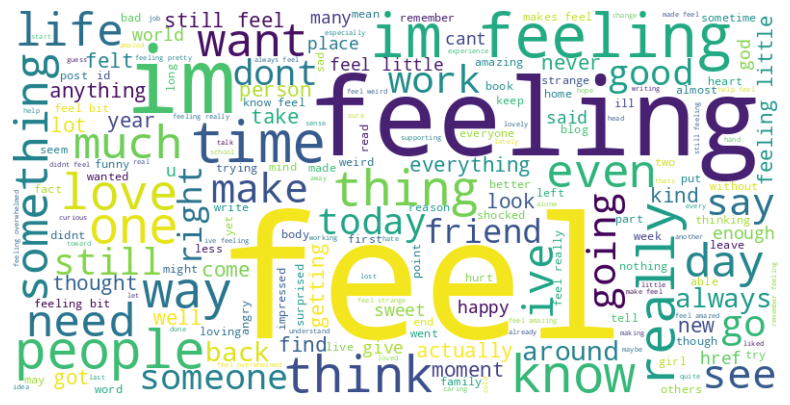

Topic 0:
feel feeling like life im people time bit much know

Topic 1:
feel like really feeling im know get dont time things

Topic 2:
feel feeling like little would time think even get im

Topic 3:
feeling im feel little today http bit href ive pretty

Topic 4:
feel feeling like one people im really want could something



In [10]:
#Performing statistical analysis on text data in Python typically involves several steps. Here's a basic outline along with some sample code:

#1. **Preprocessing**: This step involves cleaning and preparing your text data for analysis. Common preprocessing steps include tokenization, lowercasing, removing punctuation, and removing stopwords.

#2. **Exploratory Data Analysis (EDA)**: Explore the characteristics of your text data using descriptive statistics and visualizations.

#3. **Feature Extraction**: Convert the text data into numerical features that can be used for analysis. Common techniques include Bag-of-Words, TF-IDF, word embeddings (like Word2Vec or GloVe), or more advanced methods like BERT embeddings.

#4. **Statistical Analysis**: Apply statistical methods to analyze the text data. This could include techniques like hypothesis testing, regression analysis, or clustering.

#Here's some sample code to perform these steps using Python libraries such as NLTK, scikit-learn, and pandas:

#```python
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

# Step 1: Preprocessing
def preprocess(text):
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Lowercasing
    tokens = [token.lower() for token in tokens]
    # Remove punctuation
    tokens = [token for token in tokens if token.isalnum()]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    return " ".join(tokens)

# Step 2: Exploratory Data Analysis (EDA)
def explore_data(text_data):
    # Basic statistics
    word_count = text_data.apply(lambda x: len(x.split()))
    print("Mean word count:", word_count.mean())
    print("Max word count:", word_count.max())
    # Word frequency
    word_freq = nltk.FreqDist(nltk.word_tokenize(" ".join(text_data)))
    print("Most common words:", word_freq.most_common(10))
    # Word cloud (optional)
    from wordcloud import WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text_data))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Step 3: Feature Extraction
def extract_features(text_data):
    # Bag-of-Words representation
    count_vectorizer = CountVectorizer()
    bow_matrix = count_vectorizer.fit_transform(text_data)
    # TF-IDF representation
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
    return bow_matrix, tfidf_matrix, count_vectorizer, tfidf_vectorizer

# Step 4: Statistical Analysis
def statistical_analysis(text_data, feature_matrix, vectorizer):
    # Example: Topic modeling using Latent Dirichlet Allocation (LDA)
    lda = LatentDirichletAllocation(n_components=5, random_state=42)
    lda.fit(feature_matrix)
    # Display topics
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))
        print()

# Sample text data
text_data = pd.Series(filtered_df["text"].values)

# Preprocess the text data
text_data_preprocessed = text_data.apply(preprocess)

# Explore the data
explore_data(text_data_preprocessed)

# Extract features
bow_matrix, tfidf_matrix, count_vectorizer, tfidf_vectorizer = extract_features(text_data_preprocessed)

# Perform statistical analysis
# Perform statistical analysis
statistical_analysis(text_data_preprocessed, bow_matrix, count_vectorizer)
#```

#This code provides a basic framework for performing statistical analysis on text data in Python. You can customize and extend it based on your specific requirements and the characteristics of your text data.

In [22]:
# Empty list to store selected DataFrames
selected_dfs = []
promptlist=[]
contextlist=[]

context_values = [0,1,2,3,4,5]

# Iterate over each context value
for context1 in context_values:
    # Filter DataFrame based on current context value
    context_df = dataset[dataset['label'] == context1]
    # Randomly select 10 records
    selected_df = context_df.sample(n=15, random_state=0)  # Set random_state for reproducibility
    # Append selected DataFrame to list
    selected_dfs.append(selected_df)

# Concatenate all selected DataFrames into one DataFrame
result_df = pd.concat(selected_dfs)

# Print result DataFrame
print(result_df)

                                                    text  label
11031                     i feel unwelcome anywhere i go      0
631    i have felt this feeling of discontent and emp...      0
10800  i was grateful for but i did not want to conti...      0
11602                       i may come when i feel needy      0
5769   i will leave this shop and ill feel really dis...      0
...                                                  ...    ...
12462                  i feel overwhelmed and frustrated      5
3717   i think i got a free water or something i was ...      5
9105   i looked back through all my past experiences ...      5
545    i no longer feel the author or feel overwhelme...      5
4210   i have felt the comfort extended by those who ...      5

[90 rows x 2 columns]


In [23]:
result_df.reset_index(drop=True, inplace=True)
print(result_df)

                                                 text  label
0                      i feel unwelcome anywhere i go      0
1   i have felt this feeling of discontent and emp...      0
2   i was grateful for but i did not want to conti...      0
3                        i may come when i feel needy      0
4   i will leave this shop and ill feel really dis...      0
..                                                ...    ...
85                  i feel overwhelmed and frustrated      5
86  i think i got a free water or something i was ...      5
87  i looked back through all my past experiences ...      5
88  i no longer feel the author or feel overwhelme...      5
89  i have felt the comfort extended by those who ...      5

[90 rows x 2 columns]


In [24]:
prompt=[]
context=[]
GPTEmotion=[]


for i in range(0,result_df["text"].nunique()):
    message = result_df["text"][i]
    cont = result_df["label"][i]
    promptgpt = f"""Classify the following  message as the below output.
    Message: '{message}'.
    The output should only contain one word from the following:  'sadness','joy','love','anger','fear','surprise'.
    """
    #Context= """ Act as a Human Emotion Detector for a given message.
    #I am going to provide you the message that can be defined as a specific emotion and you will respond with the output that contains only the one emotion from 'joyful','sad','confident','afraid','angry','caring'  """

    #message = [ { 'role':'system' , 'content': Context},
             # {'role':'user', 'content':promptgpt}]

    messages = [{'role':'user',
     'parts': [promptgpt]}
    ]
    print("Before the sleep statement")
    time.sleep(20)
    response = model.generate_content(messages)
    # List of words to check
    words_to_check = ['text']
    try:
      response.text
      text_value = response.text
    except Exception as e:
      text_value = ' '
      print(f'{type(e).__name__}: {e}')


    # # Check if any of the words are present in the response
    # if any(word in response for word in words_to_check):
    #   text_value = response.text
    # else:
    #   text_value = ''

    #GPTRes = response.text
    prompt.append(message)
    context.append(cont)
    GPTEmotion.append(text_value)

Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
ValueError: The `response.text` quick accessor only works for simple (single-`Part`) text responses. This res

In [25]:
d={'Prompt':prompt,'Context':context,'GPT Emotion':GPTEmotion}
final=pd.DataFrame(d)


In [26]:
final

,Prompt,Context,GPT Emotion
0,i feel unwelcome anywhere i go,0,sadness
1,i have felt this feeling of discontent and emp...,0,sadness
2,i was grateful for but i did not want to conti...,0,sadness
3,i may come when i feel needy,0,sadness
4,i will leave this shop and ill feel really dis...,0,anger
...,...,...,...
85,i feel overwhelmed and frustrated,5,anger
86,i think i got a free water or something i was ...,5,surprise
87,i looked back through all my past experiences ...,5,joy
88,i no longer feel the author or feel overwhelme...,5,sadness


In [27]:
final['GPT Emotion'] = final['GPT Emotion'].str.lower()

In [28]:
emotion_mapping = {'sadness': 0, 'joy': 1, 'love': 2, 'anger': 3, 'fear': 4, 'surprise': 5}

# Map emotions to numerical values
final['GPT_numerical_emotions'] = final['GPT Emotion'].map(emotion_mapping)

In [29]:
# Drop rows with missing values in the 'GPT_numerical_emotions' column
final.dropna(subset=['GPT_numerical_emotions'], inplace=True)

# Convert the 'GPT_numerical_emotions' column to integers
final['GPT_numerical_emotions'] = final['GPT_numerical_emotions'].astype(int)


In [30]:
final

,Prompt,Context,GPT Emotion,GPT_numerical_emotions
0,i feel unwelcome anywhere i go,0,sadness,0
1,i have felt this feeling of discontent and emp...,0,sadness,0
2,i was grateful for but i did not want to conti...,0,sadness,0
3,i may come when i feel needy,0,sadness,0
4,i will leave this shop and ill feel really dis...,0,anger,3
...,...,...,...,...
85,i feel overwhelmed and frustrated,5,anger,3
86,i think i got a free water or something i was ...,5,surprise,5
87,i looked back through all my past experiences ...,5,joy,1
88,i no longer feel the author or feel overwhelme...,5,sadness,0


In [31]:
# Compute accuracy
accuracy = accuracy_score(final['GPT_numerical_emotions'], final['Context'])

# Compute other classification metrics (e.g., precision, recall, F1-score)
classification_metrics = classification_report(final['GPT_numerical_emotions'], final['Context'])

# Print accuracy and classification report
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_metrics)

Accuracy: 0.4823529411764706
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.39      0.52        31
           1       0.57      0.42      0.48        19
           2       0.17      0.50      0.25         4
           3       0.50      0.58      0.54        12
           4       0.47      0.54      0.50        13
           5       0.33      0.83      0.48         6

    accuracy                           0.48        85
   macro avg       0.47      0.54      0.46        85
weighted avg       0.59      0.48      0.50        85

